In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
path = r'C:\Users\mauri\OneDrive\Escritorio\Data Analysis\6.X'

In [3]:
df = pd.read_pickle(os.path.join(path,'airbnb_ny_open_data_cleaned.pkl'))

In [4]:
df

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,construction_year,price,service_fee,minimum_nights,number_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,13974863,Private Room in Lower East Side Apartment,651454903,unconfirmed,Maddy,Manhattan,Lower East Side,40.72310,-73.99270,United States,...,2010.0,689.0,138.0,NaN,0.0,NaN,NaN,1.0,1.0,0.0
1,13975968,Furnished Studio on Upper East Side,23765993225,verified,Jarid,Manhattan,Upper East Side,40.77138,-73.95353,United States,...,2006.0,353.0,71.0,NaN,0.0,NaN,NaN,4.0,1.0,0.0
2,13977072,King size room in foodie heaven!,3470529701,unconfirmed,Michael,Queens,Astoria,40.77084,-73.92601,United States,...,2017.0,484.0,97.0,NaN,0.0,NaN,NaN,1.0,1.0,0.0
3,24670153,Sunny and Zen room in Chelsea,25353219525,verified,Raymond,Manhattan,Chelsea,40.74147,-73.99908,United States,...,2015.0,1119.0,224.0,NaN,0.0,NaN,NaN,3.0,1.0,0.0
4,45546540,Private Room in Lower East Side Apartment,21067567029,verified,Maddy,Manhattan,Lower East Side,40.72310,-73.99270,United States,...,2010.0,689.0,138.0,NaN,0.0,NaN,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,1106273,Chelsea Studio sublet 1 - 2 months,4828083235,verified,Antony,Manhattan,Chelsea,40.74031,-73.99999,United States,...,2021.0,323.0,65.0,NaN,3.0,7/17/2015,0.03,NaN,1.0,NaN
102054,1321670,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,82631426580,verified,Daniel,Manhattan,Lower East Side,40.71813,-73.98416,United States,...,2016.0,970.0,194.0,1.0,29.0,6/3/2015,0.31,2.0,2.0,NaN
102055,1111796,cozy studio with parking spot,16211727428,unconfirmed,Dale,Queens,Middle Village,40.71722,-73.87856,United States,...,NaN,938.0,188.0,30.0,33.0,5/9/2015,0.31,4.0,5.0,NaN
102056,1328850,Harlem/Manhattan Classic Apartment,81745064262,verified,Heather,Manhattan,Harlem,40.80307,-73.95048,United States,...,2017.0,230.0,46.0,55.0,6.0,1/2/2015,0.08,5.0,2.0,NaN


In [5]:
df['number_reviews'] = df['number_reviews'].fillna(df['number_reviews'].median())
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())
df['construction_year'] = df['construction_year'].fillna(df['construction_year'].median())
df['price'] = df['price'].fillna(df['price'].median())
df['service_fee'] = df['service_fee'].fillna(df['service_fee'].median())
df['minimum_nights'] = df['minimum_nights'].fillna(df['minimum_nights'].median())
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].fillna(df['calculated_host_listings_count'].median())
df['availability_365'] = df['availability_365'].fillna(df['availability_365'].median())

In [6]:
df1 = df.drop(columns =['id','name','host_id','host_identity_verified','host_name','neighbourhood_group','neighbourhood','lat','long','country','country_code','instant_bookable','cancellation_policy','review_rate_number','room_type','last_review'])

In [7]:
df1

,construction_year,price,service_fee,minimum_nights,number_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2010.0,689.0,138.0,3.0,0.0,0.74,1.0,0.0
1,2006.0,353.0,71.0,3.0,0.0,0.74,1.0,0.0
2,2017.0,484.0,97.0,3.0,0.0,0.74,1.0,0.0
3,2015.0,1119.0,224.0,3.0,0.0,0.74,1.0,0.0
4,2010.0,689.0,138.0,3.0,0.0,0.74,1.0,0.0
...,...,...,...,...,...,...,...,...
102053,2021.0,323.0,65.0,3.0,3.0,0.03,1.0,96.0
102054,2016.0,970.0,194.0,1.0,29.0,0.31,2.0,96.0
102055,2012.0,938.0,188.0,30.0,33.0,0.31,5.0,96.0
102056,2017.0,230.0,46.0,55.0,6.0,0.08,2.0,96.0


In [8]:
# Defining the range of the cluster
num_cl = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [9]:
# Score
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

[-13888082862.775967,
 -5196533438.5804615,
 -3537054863.297513,
 -2965827601.914157,
 -2451882031.0262046,
 -2021153407.5883963,
 -1647197172.3280811,
 -1464395341.087023,
 -1293835255.2297058,
 -1201752337.9055026,
 -1111507140.9823194,
 -1055130946.8488544,
 -1002568623.4166999,
 -969484164.1787664,
 -926454583.7290788,
 -889467213.7653108,
 -853248622.1935431,
 -816666633.8937988,
 -793730002.0538621]

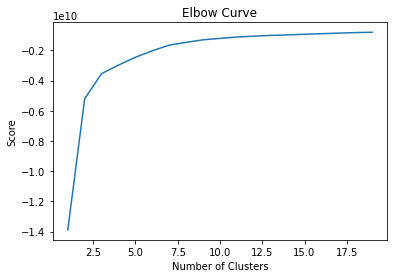

In [10]:
# create the elbow graph
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [11]:
# K-mean

In [17]:
kmeans = KMeans(n_clusters = 3) 

In [18]:
kmeans.fit(df1)

KMeans(n_clusters=3)

In [19]:
df1['clusters'] = kmeans.fit_predict(df1)

In [20]:
df1.head()

,construction_year,price,service_fee,minimum_nights,number_reviews,reviews_per_month,calculated_host_listings_count,availability_365,clusters
0,2010.0,689.0,138.0,3.0,0.0,0.74,1.0,0.0,0
1,2006.0,353.0,71.0,3.0,0.0,0.74,1.0,0.0,2
2,2017.0,484.0,97.0,3.0,0.0,0.74,1.0,0.0,0
3,2015.0,1119.0,224.0,3.0,0.0,0.74,1.0,0.0,1
4,2010.0,689.0,138.0,3.0,0.0,0.74,1.0,0.0,0


In [21]:
df1['clusters'].value_counts()

0    34506
1    34093
2    33459
Name: clusters, dtype: int64

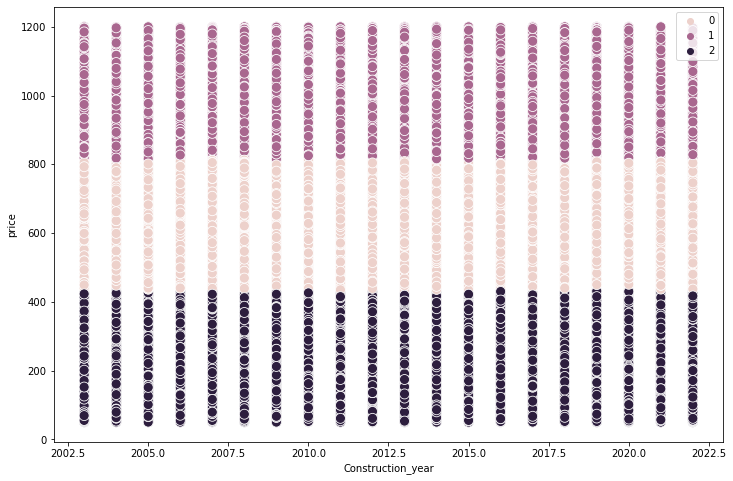

In [22]:
# compare

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['construction_year'], y=df1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Construction_year') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

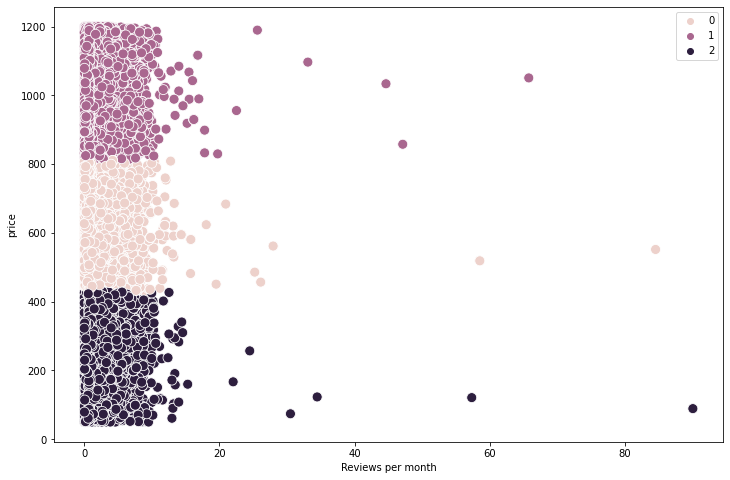

In [25]:
# compare

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['reviews_per_month'], y=df1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Reviews per month') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

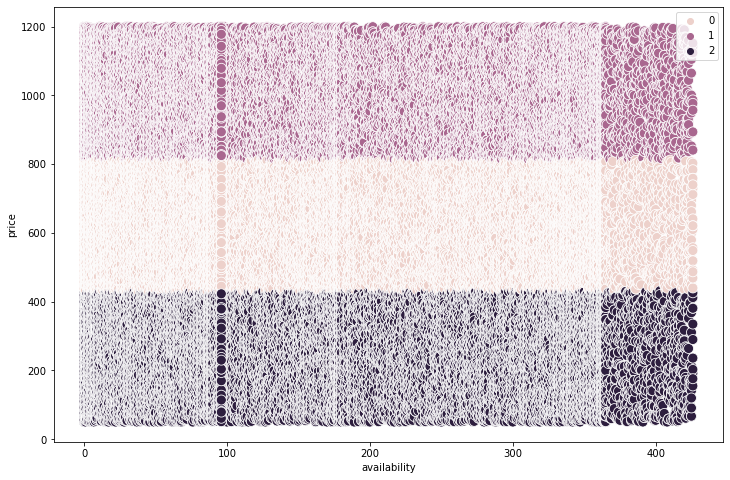

In [26]:
# compare

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['availability_365'], y=df1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('availability') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

### All the groping has being distribuited evenly which doesn't give a lot of new information because as we saw before on the pair charts there is not a big relationship between most variables, for exapmle a house that is 10 years old can be priced 800 dollars just like a house that is 5 years old which tell us that we might need to do a follow up analysis with diferent and more variables 